데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기

### 1. EDA 및 전처리

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('problem1.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


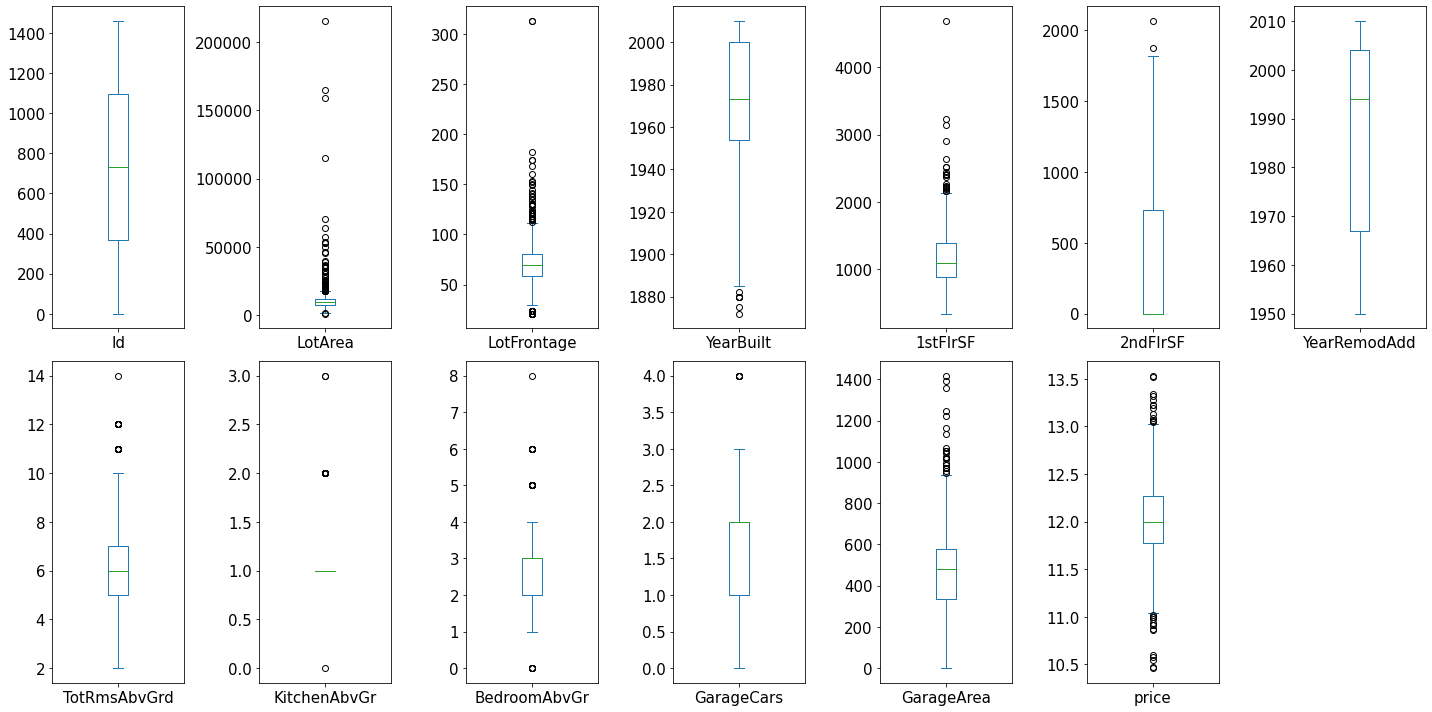

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
data.plot(kind='box', subplots=True, layout=(2,7), figsize=(20,10), fontsize=15)
plt.tight_layout()
plt.show()

### 2. Train,Valid,Test set으로 분할 및 시각화 제시

In [4]:
data2=data.copy()

data2=data2.rename(columns={'1stFlrSF':'first', '2ndFlrSF':'second'})

- 년도 데이터의 경우 최대년도 기준 몇년전인지 값으로 대체

In [5]:
#절댓값(지어진년도-지어진년도.max)
data2['YearBuilt']  = abs(data2['YearBuilt']-data2['YearBuilt'].max())
#절댓값(리모델링년도-리모델링년도.max)
data2['YearRemodAdd']  = abs(data2['YearRemodAdd']-data2['YearRemodAdd'].max())

In [6]:
X=data2.drop(columns=['Id', 'price', 'LotFrontage'])
y=data2['price']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [9]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [10]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

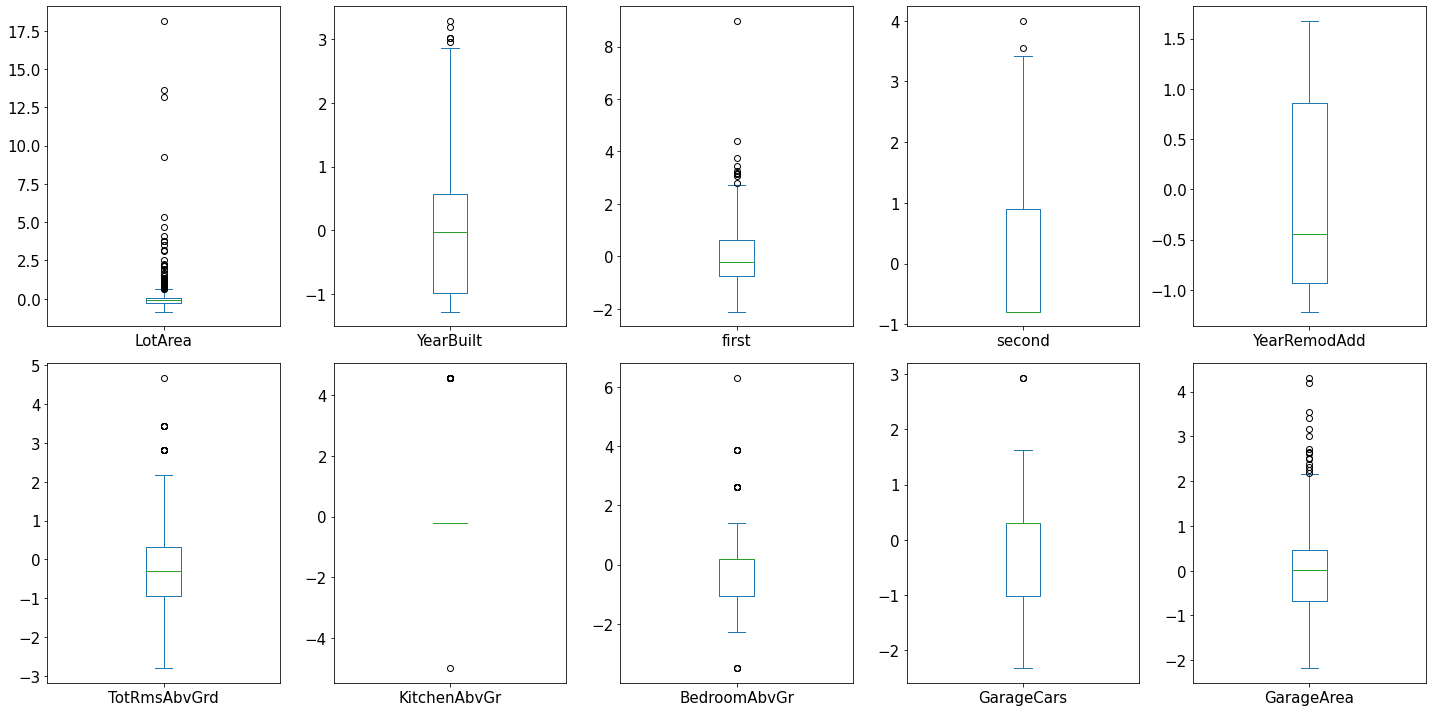

In [11]:
pd.DataFrame(X_train_sc, columns=X_train.columns).plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10), fontsize=15)
plt.tight_layout()
plt.show()

↑ 회귀분석 시 스케일링 하지 않는 것이 r-squred 값이 더 높게 나옴

### 3. 2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [12]:
from itertools import permutations
#2차 교호작용항 컬럼 생성
comb=list(permutations(X_train.columns, 3))
len(comb)
#comb

720

In [13]:
#':'로 붙임(?)
variables= '+ '.join(list(X_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb]) 

In [14]:
from statsmodels.formula.api import ols

res=ols(f'price~{variables}', data=pd.concat([X_train, y_train], axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     57.03
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:49:46   Log-Likelihood:                 604.28
No. Observations:                1095   AIC:                            -946.6
Df Residuals:                     964   BIC:                            -291.8
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 11.1537      0.146     76.330      0.000      10.867      11.440
LotArea                                 1.715e-05   5.26e-06      3.259      0.001    6.82e-06    2.75e-05
YearBuilt                                 -0.0039      0.001     -4.408      0.000      -0.006      -0.002
first                                      0.0008      0.000      6.324      0.000       0.001       0.001
second                                     0.0005      0.000      4.878      0.000       0.000       0.001
YearRemodAdd                              -0.0008      0.001     -0.573      0.567      -0.004       0.002
TotRmsAbvGrd                               0.0160      0.027      0.590      0.555      -0.037       0.069
KitchenAbvGr                              -0.2305      0.131     -1.758      0.079      -0.488       0.027
BedroomAbvGr                              -0.0360      0.032     -1.130      0.259      -0.099       0.027
GarageCars                                -0.0416      0.069     -0.599      0.549      -0.178       0.095
GarageArea                                 0.0008      0.000      3.205      0.001       0.000       0.001
LotArea:YearBuilt:first                -1.358e-10   2.13e-10     -0.637      0.524   -5.54e-10    2.83e-10
LotArea:YearBuilt:second                1.525e-10   2.44e-10      0.625      0.532   -3.26e-10    6.31e-10
LotArea:YearBuilt:YearRemodAdd         -4.612e-09   3.06e-09     -1.507      0.132   -1.06e-08    1.39e-09
LotArea:YearBuilt:TotRmsAbvGrd          9.195e-08   6.34e-08      1.450      0.147   -3.25e-08    2.16e-07
LotArea:YearBuilt:KitchenAbvGr          7.674e-08   2.76e-07      0.278      0.781   -4.64e-07    6.18e-07
LotArea:YearBuilt:BedroomAbvGr         -1.306e-07   1.14e-07     -1.149      0.251   -3.54e-07    9.25e-08
LotArea:YearBuilt:GarageCars           -9.988e-08    1.9e-07     -0.526      0.599   -4.72e-07    2.73e-07
LotArea:YearBuilt:GarageArea           -8.831e-11   6.29e-10     -0.140      0.888   -1.32e-09    1.15e-09
LotArea:first:second                   -3.216e-11   1.08e-11     -2.983      0.003   -5.33e-11    -1.1e-11
LotArea:first:YearRemodAdd             -7.201e-10   2.82e-10     -2.550      0.011   -1.27e-09   -1.66e-10
LotArea:first:TotRmsAbvGrd              -1.31e-09   1.66e-09     -0.788      0.431   -4.57e-09    1.95e-09
LotArea:first:KitchenAbvGr              1.118e-08   1.91e-08      0.587      0.558   -2.62e-08    4.86e-08
LotArea:first:BedroomAbvGr              4.666e-09   6.94e-09      0.672      0.502   -8.96e-09    1.83e-08
LotArea:first:GarageCars                2.624e-09   9.08e-09      0.289      0.773   -1.52e-08    2.04e-08
LotArea:first:GarageArea                9.309e-12      2e-11      0.464      0.642     

### 4. 벌점(릿지, 랏소), 앙상블(랜덤포레스트)을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)/y_test))*100

In [16]:
ls=Lasso()
rd=Ridge()
rf=RandomForestRegressor()

def modelpipe(model):
    model.fit(X_train, y_train)
    model_pred=model.predict(X_test)
    mse=mean_squared_error(y_test, model_pred)
    r2score=r2_score(y_test, model_pred)
    mape=MAPE(y_test, model_pred)
    
    metrics=[mse, r2score, mape]
    return metrics

ls_result=modelpipe(ls)
rd_result=modelpipe(rd)
rf_result=modelpipe(rf)

result=pd.DataFrame([ls_result, rd_result, rf_result], columns=['mse', 'r2', 'mape'], index=['lasso', 'ridge', 'randomForest'])
result

,mse,r2,mape
lasso,0.039706,0.698146,1.130480
ridge,0.035778,0.728009,1.067252
randomForest,0.031156,0.763144,1.002800
